<IPython.core.display.Javascript object>


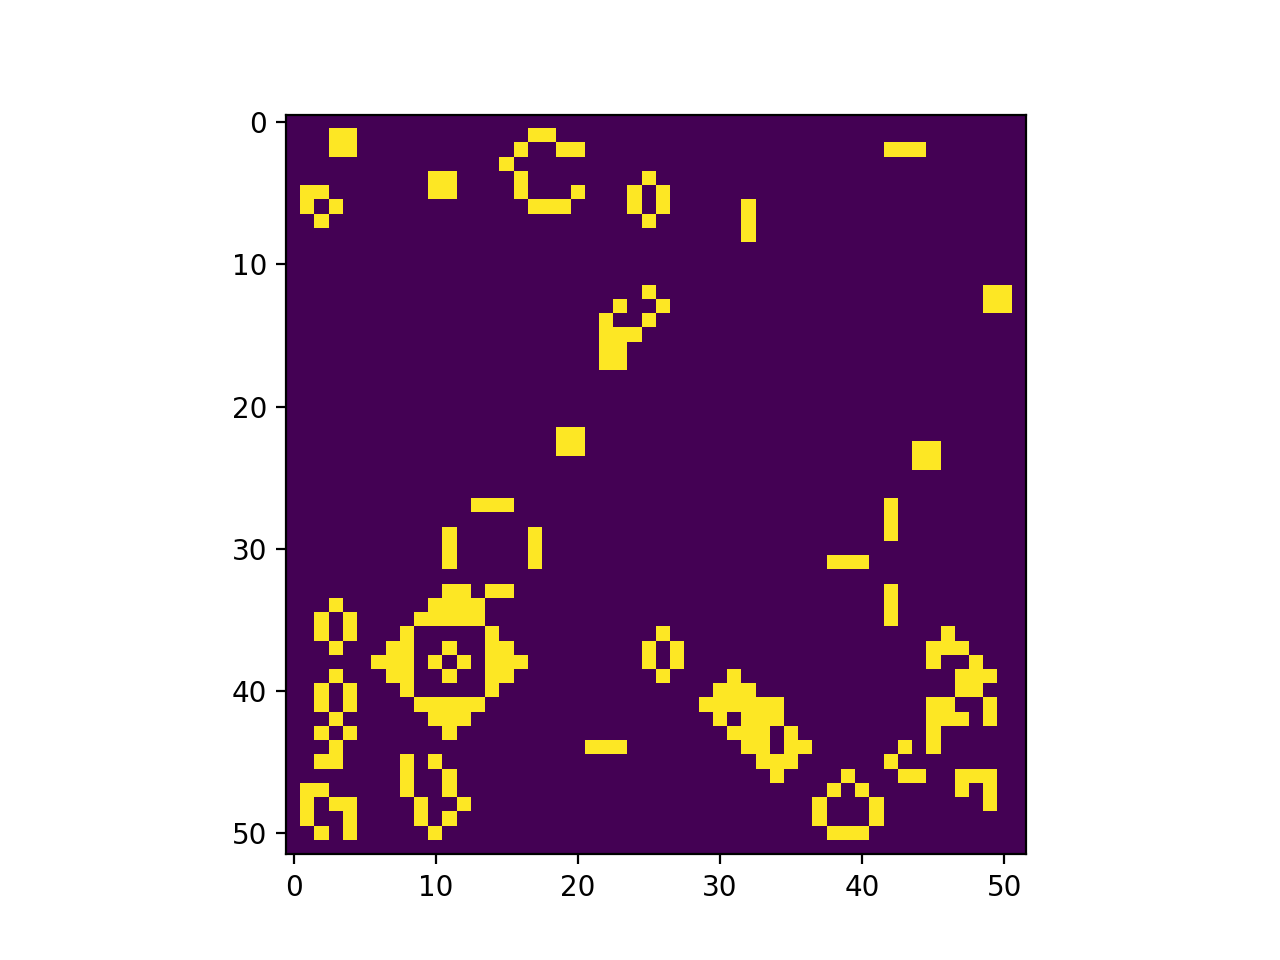

In [3]:
import time
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import numpy as np
import seaborn as sns
import random

# Some helper functions

# Initialize the board with starting positions
def init_board(pos_list, my_board):
    for pos in pos_list:
        my_board[pos[0], pos[1]] = 1
    return my_board

# Make sure padded border values are always zero
def force_pad_zero(my_board):
    edge_row_0 = 0
    edge_row_1 = my_board.shape[0] - 1
    edge_col_0 = 0
    edge_col_1 = my_board.shape[1] - 1
    for index, row in enumerate(my_board):
        if index == 0:
            row[:] = 0
        elif index == edge_row_1:
            row[:] = 0
        else:
            row[edge_col_0] = 0
            row[edge_col_1] = 0
    for col in my_board:
        col[edge_row_0] = 0
        col[edge_row_1] = 0
    return my_board

# Figure out the number of neighbors for a given cell
def calc_neighbors(row, col, my_board):
    b = force_pad_zero(my_board)
    num_neighbors = (b[row-1,col-1] + b[row+0,col-1] + b[row+1,col-1] + b[row+1,col+0] 
                   + b[row+1,col+1] + b[row+0,col+1] + b[row-1,col+1] + b[row-1,col+0])
    return num_neighbors

# Update the board based on the game rules, each call to update_board is one turn
def update_board(my_board):
    old_board = my_board.copy()
    set_zero = []
    set_one = []
    # Loop through board and update according to rules
    for i, row in enumerate(my_board[1:-1,1:-1]):
        for j, col in enumerate(row):
            true_i = i + 1
            true_j = j + 1
            # Update based on number of neighbors (using calc_neighbors)
            # set_zero and set_one are lists that tell me the coordinates of cells that require updating
            if (((calc_neighbors(true_i, true_j, my_board) <= 1) 
                  or (calc_neighbors(true_i, true_j, my_board) >= 4))
                  and my_board[true_i, true_j] != 0):
                set_zero.append([true_i, true_j])
            elif ((calc_neighbors(true_i, true_j, my_board) == 3)
                  and my_board[true_i, true_j] == 0):
                set_one.append([true_i, true_j])
    # Update the required cells
    for index, val in enumerate(set_zero):
        my_board[val[0], val[1]] = 0
    for index, val in enumerate(set_one):
        my_board[val[0], val[1]] = 1
    return my_board

# Input variables for the board
boardsize = 50        # board will be X by X where X = boardsize
pad = 2               # padded border, do not change this!
initial_cells = 1500  # this number of initial cells will be placed 
                      # in randomly generated positions

# Get a list of random coordinates so that we can initialize 
# board with randomly placed organisms
pos_list = []
for i in range(initial_cells):
    pos_list.append([random.randint(1, boardsize), 
                     random.randint(1, boardsize)])

# Initialize the board
my_board = np.zeros((boardsize+pad, boardsize+pad))
my_board = init_board(pos_list, my_board)

##### Animate the board #####
# This will throw an error the first time you run the code, but the program will run properly if you
# execute the cell again (there is an error with the animation package that I cannot seem to get rid of)

# Required line for plotting the animation
%matplotlib notebook
# Initialize the plot of the board that will be used for animation
fig = plt.gcf()
# Show first image - which is the initial board
im = plt.imshow(my_board)
plt.show()
plt.savefig(fname='game_of_life', dpi=150)

# Helper function that updates the board and returns a new image of
# the updated board animate is the function that FuncAnimation calls
def animate(frame):
    im.set_data(update_board(my_board))
    return im,

# This line creates the animation
anim = animation.FuncAnimation(fig, animate, frames=200, 
                               interval=50)